<a href="https://colab.research.google.com/github/Araar-Taha/realGemme/blob/master/StudentChallenge02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# loading dataset

In [243]:
x_train = pd.read_csv('X_train.csv')
x_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
submission = pd.read_csv('submission.csv')

In [244]:
x_train['Course'] = StandardScaler().fit_transform(x_train['Course'].values.reshape(-1, 1))

In [290]:
x_train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
557,1,1,3,0.445374,1,1,143.0,11,19,19,...,0,0,6,7,6,13.000000,0,16.2,0.3,-0.92
1586,1,1,4,0.314425,1,1,141.0,1,38,38,...,0,0,8,8,8,13.391250,0,9.4,-0.8,-3.12
602,1,17,1,0.108168,1,1,126.0,1,19,38,...,0,0,6,6,6,12.666667,0,16.2,0.3,-0.92
442,1,17,1,0.188752,1,1,122.0,1,3,1,...,0,0,6,8,6,12.428571,0,13.9,-0.3,0.79
1775,1,17,2,0.115363,1,1,138.0,1,37,37,...,3,0,5,10,4,11.750000,1,9.4,-0.8,-3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,39,1,0.549942,0,1,160.0,41,37,19,...,0,0,5,10,4,10.500000,0,15.5,2.8,-4.06
1294,1,44,1,0.115363,1,39,120.0,1,37,37,...,0,0,6,14,3,11.000000,0,16.2,0.3,-0.92
860,1,7,1,0.314425,1,2,140.0,1,38,37,...,1,0,8,14,4,11.325000,1,12.7,3.7,-1.70
3507,2,39,1,0.196427,1,1,130.0,1,37,37,...,0,0,6,10,5,13.000000,0,8.9,1.4,3.51


In [295]:
x_train['Marital status'].value_counts()

1    2814
2     279
4      69
5      16
6       4
3       2
Name: Marital status, dtype: int64

# droping Id

In [246]:
x_train = x_train.drop(columns=['id'])
x_test = x_test.drop(columns=['id'])
y_train = y_train.drop(columns=['id'])



In [247]:
y_train['Target'].replace(['Dropout', 'Enrolled', 'Graduate'],
                        [0, 1, 2], inplace=True)

In [248]:
x_train.shape

(3981, 36)

In [249]:
y_train

,Target
0,0
1,2
2,0
3,0
4,2
...,...
3976,2
3977,2
3978,1
3979,0


# turn to one hot encoded

In [250]:
y_train = to_categorical(y_train, num_classes=3)

In [251]:
y_train.shape

(3981, 3)

# spliting dataset

In [252]:
 x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42,)

In [253]:
x_train.shape

(3184, 36)

In [254]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
x_train.dtypes

In [256]:
my_model = XGBRegressor(n_estimators=100,enable_categorical=True, learning_rate=0.05)


In [257]:
my_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [258]:
x_val

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
408,1,39,1,-4.226596,1,1,140.0,1,3,1,...,0,0,7,12,5,13.800000,3,16.2,0.3,-0.92
3322,1,1,1,-4.160402,1,1,159.0,1,3,3,...,0,0,0,0,0,0.000000,0,16.2,0.3,-0.92
682,1,1,1,0.188752,1,1,133.1,1,1,1,...,0,0,6,6,6,14.166667,0,12.7,3.7,-1.70
3158,1,17,6,0.341286,1,1,134.0,1,19,38,...,0,0,8,8,8,13.312500,0,12.7,3.7,-1.70
2356,5,39,1,0.314425,1,1,110.0,1,38,38,...,1,0,8,8,0,0.000000,1,12.7,3.7,-1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,2,39,1,0.145102,1,1,140.0,1,38,37,...,2,0,5,15,3,10.666667,0,9.4,-0.8,-3.12
500,2,39,1,0.314425,1,19,133.1,1,38,38,...,0,0,8,11,0,0.000000,0,16.2,0.3,-0.92
3975,1,17,2,0.483748,1,1,127.0,1,19,38,...,0,0,7,9,6,12.500000,0,12.4,0.5,1.79
2765,1,1,1,0.314425,1,1,131.0,1,4,4,...,0,0,7,7,6,14.150000,0,7.6,2.6,0.32


In [259]:
preds = my_model.predict(x_val)

In [260]:
preds.shape

(797, 3)

In [261]:
preds

array([[0.09470724, 0.25859293, 0.34178257],
       [0.38552582, 0.05925675, 0.54101974],
       [0.20171387, 0.07214508, 0.7411677 ],
       ...,
       [0.09346151, 0.32592693, 0.6665385 ],
       [0.01055046, 0.05254203, 0.9098788 ],
       [0.1338527 , 0.74089485, 0.3555145 ]], dtype=float32)

In [262]:
preds = [y.argmax() for y in preds]


In [263]:
preds

[2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,


In [264]:
y_train = to_categorical(y_train, num_classes=3)

# remaping

In [265]:
def remaping(x):
  if x==0:
    return 'Dropout'
  elif x==1:
    return 'Enrolled'
  elif x==2:
    return 'Graduate'

In [266]:
final_preds = [remaping(y) for y in preds]

In [ ]:
final_preds

In [268]:
y_val

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [269]:
mse = mean_squared_error(y_val, preds)

ValueError: y_true and y_pred have different number of output (3!=1)

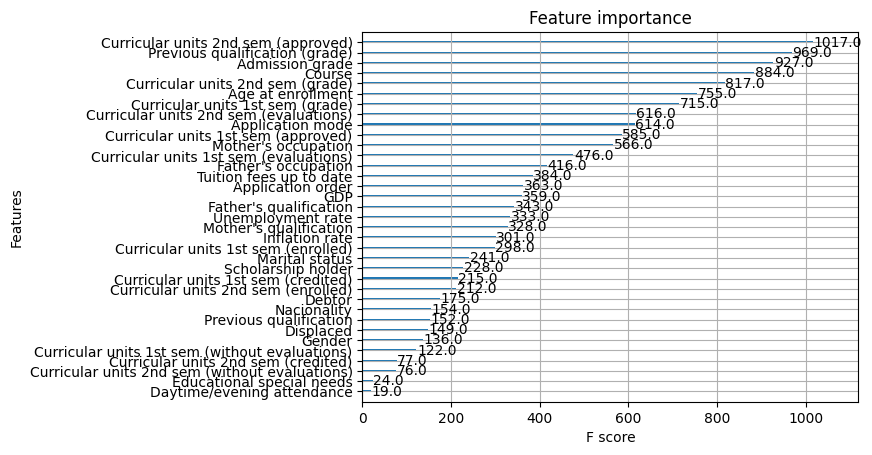

In [270]:
import matplotlib.pyplot as plt
xgb.plot_importance(my_model)
plt.show()

In [271]:
print(mse)

0.25095456206983485


In [ ]:
final_preds

# testing on submission data

In [273]:
predictions = my_model.predict(x_test)

In [274]:
predictions

array([[0.02068356, 0.13699272, 0.9152324 ],
       [0.05733548, 0.09202413, 0.97399396],
       [0.27593893, 0.4625664 , 0.03464863],
       ...,
       [0.321812  , 0.42417568, 0.09258585],
       [0.04011318, 0.18246685, 0.8340245 ],
       [0.22339137, 0.29568934, 0.14043637]], dtype=float32)

In [275]:
predictions = [y.argmax() for y in predictions]

one hot encoded predections

In [276]:
predictions_onehot = to_categorical(y_train, num_classes=3)

In [ ]:
predictions

In [ ]:
predictions_onehot

In [279]:
final_predictions = [remaping(y) for y in predictions]

In [ ]:
final_predictions

In [281]:
output = pd.DataFrame({'id': submission.id,
                       'Target':final_predictions })
output.to_csv('submission.csv', index=False)